In [1]:
import pandas as pd
df = pd.read_csv('/content/balancedData.csv')
pd.set_option("display.max_columns", None)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,50,13.4,22.9,0.6,8.0,10.7,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,False,False,12
1,50,7.4,25.1,0.0,5.6,7.5,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,2.0,3.0,17.2,24.3,False,False,12
2,50,12.9,25.7,0.0,5.6,11.0,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,False,12
3,50,9.2,28.0,0.0,1.2,8.2,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,False,False,12
4,50,17.5,32.3,1.0,8.0,4.8,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183855,32,11.0,17.9,0.6,1.8,2.1,14.0,28.0,9.0,14.0,9.0,13.0,71.0,53.0,1017.6,1016.0,6.0,3.0,13.2,16.2,False,True,5
183856,35,4.5,18.6,0.0,2.6,8.2,9.0,37.0,9.0,9.0,11.0,28.0,73.0,56.0,1004.9,1003.9,5.0,7.0,11.3,16.7,False,True,8
183857,5,5.9,13.7,1.5,14.0,4.0,4.0,50.0,7.0,6.0,31.0,20.0,68.0,76.0,1018.9,1019.3,8.0,7.0,10.7,11.7,True,True,10
183858,19,13.0,18.8,1.5,2.4,4.9,4.0,39.0,13.0,10.0,9.0,19.0,99.0,56.0,1016.9,1014.6,8.0,0.0,16.5,20.5,True,True,6


In [2]:
X = df[['Sunshine', 'Humidity9am', 'Cloud9am', 'Cloud3pm','RainToday', 'Humidity3pm', 'Rainfall']]
Y = df["RainTomorrow"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)


In [3]:
len(X.columns)

7

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
from xgboost import XGBClassifier
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = XGBClassifier(**params_xgb)

In [6]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

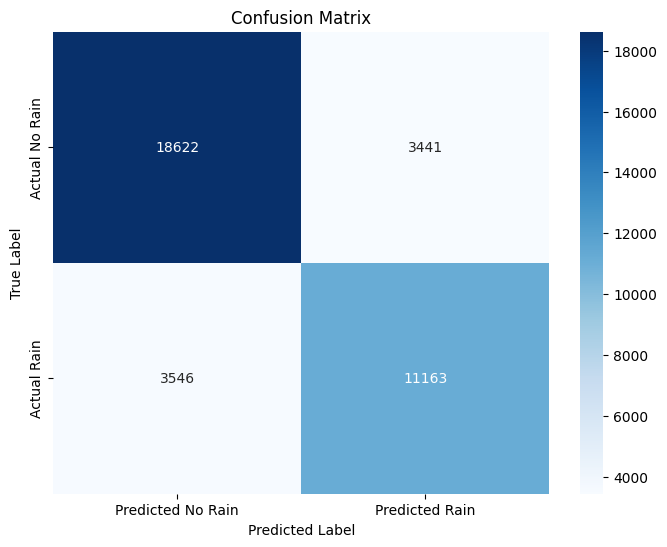

              precision    recall  f1-score   support

       False    0.84004   0.84404   0.84203     22063
        True    0.76438   0.75892   0.76164     14709

    accuracy                        0.80999     36772
   macro avg    0.80221   0.80148   0.80184     36772
weighted avg    0.80978   0.80999   0.80988     36772



In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model_xgb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_test,y_pred,digits=5))

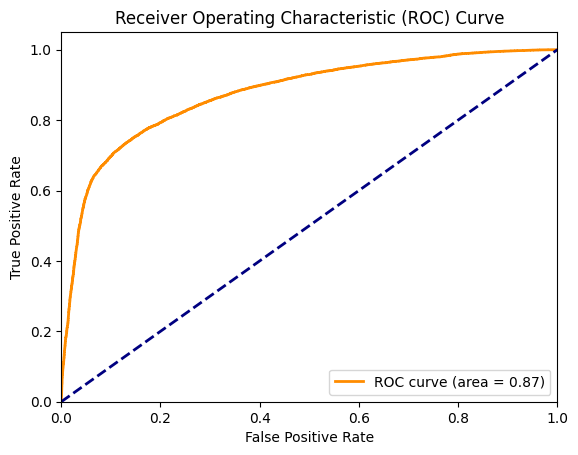

In [8]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model_xgb.predict_proba(X_test)
positive_class_proba = y_pred_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()